## OpenAI demo app for chat, code and image generation

We start by connecting to our google drive as before

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Afterwards we need to retrieve our API key from the OpenAI workspace, the API key can be found under your account **View API Key**. It is important to save the key once we create it since the OpenAI Service will only display the key once during the creation process:

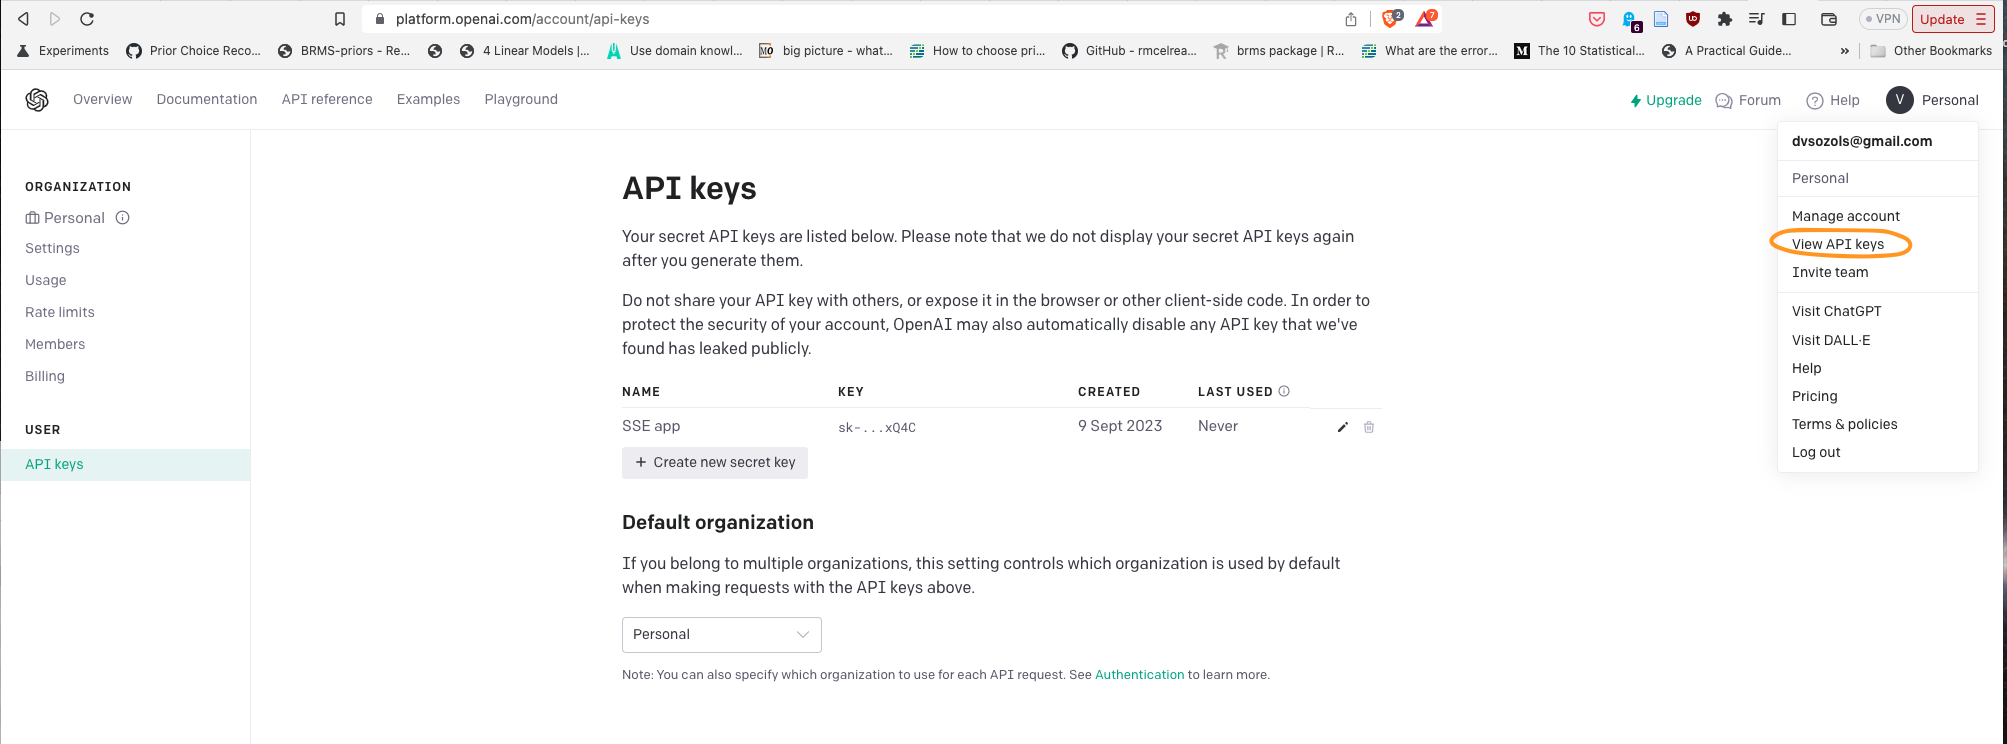



Once we have saved our api key (for example in a txt file) we can install the necessary python library from OpenAI

In [ ]:
pip install openai

Afterwards we need to import the libraries we will use for our demos and create a variable for our api_key.
- By setting it for opneai.api_key it will be saved for the duration of this session.
- Saving your api key in the application code is an easy way to demo things but is not the best practice in life, we should seperate passwords from the applications we create

In [ ]:
import os
import openai
import IPython

openai.api_key = "please-paste-your-API-key-here"

### Generic Chat example with ability to edit functionality

Our first demo is a generic one-shot system for asking questions to ChatGPT. The demo is implemented as a standalone python function called **chatWithGPT()**. We can manipulate two things in this demo:
- System behaviour defined in the **system_prompt** variable - these are the instructions for how the system should behave, e.g., translate incoming text to spanish
- User input in form of text defined in the **user_prompt** variable - this is the user generated text we send to ChatGPT

Important to note, our system is one-shot in the sense that we can only ask one question at a time, no conversation history is kept. This is great for simple applicatations such as document summaries or text transaltion.

In [ ]:
def chatWithGPT(system_prompt, user_prompt):

  """
  A simple function that allows us to ask questions to chatGPT with two variables:
  system_prompt = system message, this defines the behaviour of our chatGPT model
  user_prompr = user message, this is the question we want to ask
  """

  completion = openai.ChatCompletion.create(
      # define the model we want to use, e.g. gpt3.5, gpt4 etc.
      model="gpt-4",
      # define the messages we want to send, chat models need two inputs system
      # and user prompts defined by role
      messages=[
          {
              "role": "system",
              "content": system_prompt
          },
          {
              "role": "user",
              "content": user_prompt
          }
        ]
  )

  return print(completion.choices[0].message.content)

In [ ]:
system_message = '''
Follow four three instructions below in all your responses:
1. Use Spanish language only;
2. Do not use English except in programming languages if any;
3. Translate any other language to the Spanish language whenever possible;
4. When available use literary form of translation.
'''
user_message = 'Now is the winter of our discontent, Made glorious summer by this sun of York'

chatWithGPT(system_message, user_message)

### Generic Code debugging application

While we can use more generic translation services our next demo helps us with writing Python code. The function **fixMyCode** can be used to help us programm in Python. It has only one input:
- User generated Python code example in the **code** variable.

System role here is 'hard-coded' - provided in the function definition. The idea of this demo is that we can provide ChatGPT with a python code that is not working due to a bug, our function will then provide us with the fixed code and comments on what was wrong in our input and how it was fixed. This is a very useful tool if we need a coding assistant (and we do not want to invest in github Copilot).

In [ ]:
def fixMyCode(code):
  """
  A simple function that uses chatGPT to fix python code that does not work with one variable:
  code = user message, that consists of a python code section
  """

  completion = openai.ChatCompletion.create(
      # define the model we want to use, e.g. gpt3.5, gpt4 etc.
      model = "gpt-4",
      # define the messages we want to send, chat models need two inputs system
      # and user prompts defined by role
      messages = [
          {
              "role": "system",
              "content":
              '''You are an assistant that helps debugging and fixing python code, always follow these steps when providing an answer:
              1. Briefly describe the issue with the provided python code section
              2. Provide a fixed python code section
              3. Include comments for the code you created'''
          },
          {
              "role": "user",
              "content": "find error in the python script below and fix it: " + code
          }
        ]
  )

  return print(completion.choices[0].message.content)

In [ ]:
code_example = '''
def some_function():
    print("I'm going to sleep")
    time.sleep(10)
    print("I'm awake again")

some_function()
'''

fixMyCode(code_example)

### Generic image generation function for OpenAI

The final demo function simply showcases OpenAI abilities in generating images. We use the image generation model together with a user input (prompt) to generate and display an image. In this case we only have one possible input the user generated prompt.

In [ ]:
def createImageWithGPT(prompt):
  """
  A simple function that uses OpenAI Image creation models to provide a 512x512 image based on a prompt.
  It has one variable:
  prompt = user message, that defines what image should be generated
  """

  completion = openai.Image.create(
      prompt = prompt,
      n = 1,
      size = "512x512"
  )

  return IPython.display.HTML("<img src =" + completion.data[0].url + ">")

In [ ]:
image_prompt = 'Create an image of KPMG Lighthouse Data Scientist engaged in developing AI applications'

createImageWithGPT(image_prompt)

### Example of creating a chat interface with memory

Our previous demos were one-shot instances, we could simply ask a question or send text to chatGPT and get an answer. LLMs by default do not have a memory system - that is, they have no ability to recover what was previously asked. They have the ability to predict the next tokens in the sentence, but not to keep prevous interactions in a memory system.

![jupyter.png](https://www.borealisai.com/wp-content/uploads/2023/07/Figure-6-V6.png)

In all the instances where we have a chat interface with a LLM, this is achieved by constantly providing our prevoius interactions (user questions and system answers) as part of the new prompt. In other words we have to add all the chat history to the last question we are asking.

<br>

To simulate this behaviour we use a combination of google colab input() function that alows us to write text input in a cell and 'while' loop that will keep our demo running until a certain condition is met (we enter :q in the chat section).

The demo consists of a messages section which holds system instructions (how the model should behave) and user input that is added to the message. After the question is answered this is saved as part of the next message that will be sent to the model with the next question.

In [ ]:
#create a context to your chat
messages = [
    {
        "role":"system",
        "content":'''
        You are a Machine Learning expert assistant that answers only Machine Learning questions and provides references for Machine Learning papers.
        These are your instructions:
        1. Do not provide any other information that is not related to Machine Learning.
        2. When Asked to provide information that does not relate to Machine Learning state that this is not part of your instructions'''
    }
    ]


while True:
    # This line creates a user input field where you can write your question
    content = input("User: ")

    # You can write :q to finish the chat session
    if content == ":q":
        break

    # This will add your input to the conversation in form of a question (content)
    messages.append({"role":"user", "content": content})

    response = openai.ChatCompletion.create(
        model = "gpt-4",
        messages = messages
        )

    # This is the ChatGPT answer
    response_content = response.choices[0].message.content

    # This will add the ChatGPT answer to the conversation to create a memory of the answer
    messages.append({"role":"assistant", "content": response_content})

    print(response_content)